<a href="https://colab.research.google.com/github/pedroohsilva/analise-risco-de-credito/blob/main/analise_de_predicao_de_renda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predição de Renda - Base do Censu Demográfico:

O projeto visa aplicar técnicas avançadas de ciência e análise de dados ao conjunto de dados do censo populacional, com o objetivo de prever se a renda anual dos indivíduos excede ou não 50 mil dólares. Serão utilizadas abordagens de aprendizado supervisionado, incluindo técnicas de pré-processamento, exploração e visualização dos dados, seleção de atributos relevantes e construção de modelos preditivos eficazes. A análise busca identificar padrões significativos nas variáveis socioeconômicas, educacionais e profissionais para melhorar a precisão na classificação e auxiliar na tomada de decisões baseadas em dados.

**Fonte dos dados (adaptado):** https://archive.ics.uci.edu/dataset/2/adult

| Nome da Variável      | Descrição                                                         |
|:----------------------|:------------------------------------------------------------------|
| `age`                 | Idade da pessoa                                                   |
| `workclass`           | Classe trabalhista (tipo de emprego)                              |
| `final-weight`        | Peso final atribuído pelo censo (representatividade)              |
| `education`           | Nível de educação alcançado                                       |
| `education-num`       | Número representativo da escolaridade                             |
| `marital-status`      | Estado civil                                                      |
| `occupation`          | Ocupação profissional                                             |
| `relationship`        | Relação familiar ou conjugal                                      |
| `race`                | Raça                                                              |
| `sex`                 | Gênero                                                            |
| `capital-gain`        | Ganhos de capital (rendimentos extraordinários)                   |
| `capital-loss`        | Perdas de capital                                                 |
| `hour-per-week`       | Horas trabalhadas por semana                                      |
| `native-country`      | País de origem                                                    |
| `income`              | Faixa salarial (<=50K ou >50K dólares anuais)                     |

## Pré-Processamento de Dados

### Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
base_census = pd.read_csv("census.csv")

In [ ]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Estatísticas gerais dos dados
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Verificando valores nulos
base_census.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


### Visualização de Dados:

In [ ]:
# Analisando valores únicos de renda
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

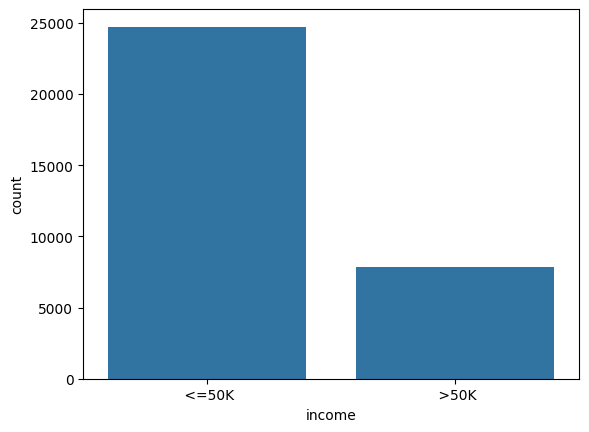

In [ ]:
# Analisando as frequências de renda
sns.countplot(x=base_census['income']);

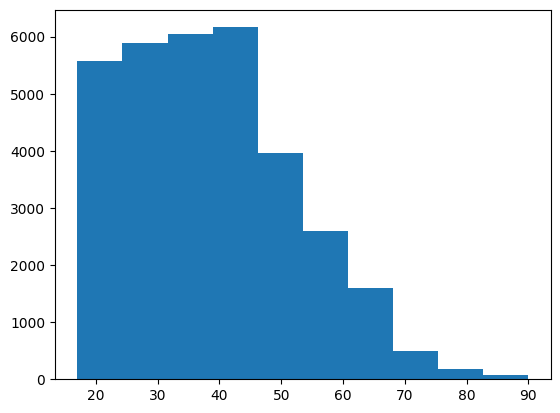

In [ ]:
# Analisando a distribuição de idades
plt.hist(base_census['age']);

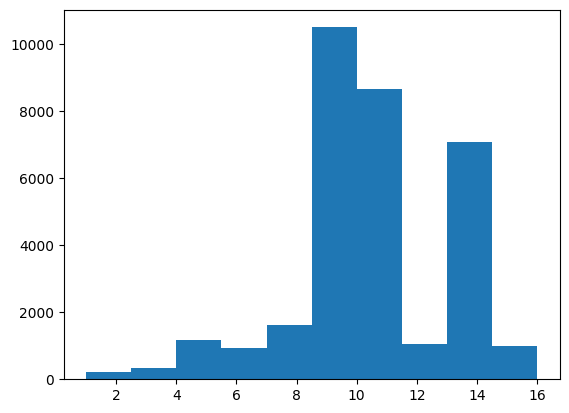

In [ ]:
# Número de anos que as pessoas
plt.hist(base_census['education-num']);

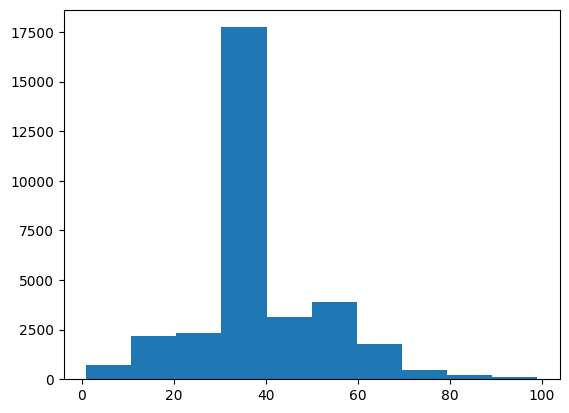

In [ ]:
# Horas semanais
plt.hist(x=base_census['hour-per-week']);

In [ ]:
# Gráfico treemap
grafico = px.treemap(base_census, path=['hour-per-week', 'income'])
grafico.show()

In [ ]:
# Gráfico de categorias paralelas - renda e nível de formação
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

Ao analisar os dados, observa-se que indivíduos com níveis de formação mais elevados tendem a apresentar maiores rendimentos anuais. Especificamente, pessoas que possuem pelo menos o ensino médio completo (HS-grad) ou graduação (Bachelors) têm uma probabilidade maior de atingir uma renda anual acima de 50 mil dólares. Essa tendência ressalta a importância da formação educacional como fator determinante na predição de renda e destaca a relevância do nível educacional como variável significativa para análises preditivas na área socioeconômica.

### Divisão entre os Previsores e Classe:

In [ ]:
# Colunas do dataset
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Definindo os atributos previsores formato de array (todos menos 'income')
X_census = base_census.iloc[:, 0:14].values

In [ ]:
# Visualizando resultados
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
# Definindo o 'income' como a classe previsora
y_census = base_census.iloc[:, 14].values

In [ ]:
# Visualizando resultados
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Tratamento de Dados Categóricos:

### LabelEncoder:

O LabelEncoder é uma técnica utilizada em Machine Learning para transformar variáveis categóricas (texto ou dados nominais) em valores numéricos, facilitando o uso desses dados por algoritmos que exigem inputs numéricos.

In [ ]:
# Importação de pacotes necessários para o LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Instanciando o objeto de tranformação de dados
label_encoder = LabelEncoder()

In [ ]:
# Dataset antes
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

#### Variáveis de Transformação:

In [ ]:
# Variáveis de Transformação
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

#### Executando Transformações:

In [ ]:
# Executando Transformações
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
# Avaliando resultados das conversões (string para números)
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
# Avaliando todo o dataset
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### OneHotEncoder:

O OneHotEncoder é uma técnica usada em machine learning para converter variáveis categóricas (não ordenadas) em uma representação numérica binária, conhecida como codificação "one-hot".

Diferente do LabelEncoder, que atribui números inteiros às categorias (podendo sugerir uma ordem inexistente), o OneHotEncoder cria colunas adicionais com valores 0 ou 1, evitando qualquer relação ordinal entre as categorias.

In [ ]:
# Observando categorias únicas da coluna 'workclass'
len(np.unique(base_census['workclass']))

9

In [ ]:
# Observando categorias únicas da coluna 'occupation'
len(np.unique(base_census['occupation']))

15

In [ ]:
# Importação de pacotes necessários para o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Variável que instancia o objeto de trnasformação de colunas
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

Ao utilizar o **ColumnTransformer**, podemos selecionar determinadas colunas para aplicar transformações específicas (por exemplo, OneHotEncoder, StandardScaler, etc.). Contudo, é comum haver colunas que não desejamos }transformar.

---

Nesse caso, temos duas opções para o parâmetro remainder:

- **'passthrough'** (padrão mais comum):
As colunas que não forem transformadas explicitamente são mantidas intactas, sendo apenas copiadas para a saída final do processo.

- **'drop':**
Todas as colunas que não forem especificadas explicitamente serão excluídas do resultado final.

In [ ]:
# Executando transformações
X_census = onehotencoder_census.fit_transform(X_census).toarray()

**fit_transform(X_census):**

O método fit_transform() executa dois processos simultaneamente:

- **fit():**
Aprende e registra os padrões encontrados nos dados, como as categorias existentes em cada coluna categórica.

---

- **transform()**:
Aplica as transformações aprendidas pelo fit() aos dados originais (X_census).

Após esta etapa, temos uma matriz transformada, geralmente do tipo matriz esparsa (sparse matrix).

In [ ]:
# Avaliando resultados
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
# Avaliando resultados
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
# Avaliando a forma do dataset
print(f"O conjunto de dados possui {X_census.shape[0]} linhas e {X_census.shape[1]} colunas.")

O conjunto de dados possui 32561 linhas e 108 colunas.


### Escalonamento de Atributos:

O escalonamento de atributos (Feature Scaling) é importante no desenvolvimento de algoritmos de machine learning porque permite que todas as variáveis estejam na mesma escala numérica, garantindo um desempenho mais eficiente e estável durante o aprendizado dos modelos.



In [ ]:
# Importa a classe StandardScaler da biblioteca sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Cria um objeto do tipo StandardScaler para padronizar os dados
scaler_census = StandardScaler()

# Ajusta (fit) o objeto scaler aos dados (aprende a média e o desvio padrão de cada coluna)
# e aplica a transformação aos dados originais, realizando a padronização
X_census = scaler_census.fit_transform(X_census)

# Após essa etapa, X_census terá média zero e desvio padrão igual a 1 em todas as colunas

In [ ]:
# Avaliando resultados
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

### Divisão dos Conjuntos de Dados (treinamento e teste):

In [ ]:
# Importando pacotes para divisão das bases
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
# X_census são as variáveis preditoras (atributos), enquanto y_census são as classes (rótulos)

# Corrected variable names within train_test_split
X_census_train, X_census_test, y_census_train, y_census_test = train_test_split(
    X_census,  # Atributos (variáveis independentes) dos dados
    y_census,  # Rótulos (variável dependente) dos dados
    test_size=0.25,  # 25% dos dados serão usados para o conjunto de teste, o restante será para treinamento
    random_state=0  # Garante que a divisão dos dados seja reproduzível (mesma divisão toda vez que rodar o código)
)

#### Bases de Treinamento:
Esses dois conjuntos representam as variáveis independentes (X) e dependentes (y) para o treinamento do modelo.

In [ ]:
X_census_train.shape, y_census_train.shape

((24420, 108), (24420,))

#### Bases de Teste:
Esses dois conjuntos serão usados para avaliar a performance do modelo após o treinamento.

In [ ]:
X_census_test.shape, y_census_test.shape

((8141, 108), (8141,))